> ## Question 1
A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]

In [1]:
def reconstruct_permutation(s):
    n = len(s)
    perm = []
    low, high = 0, n

    for ch in s:
        if ch == 'I':
            perm.append(low)
            low += 1
        elif ch == 'D':
            perm.append(high)
            high -= 1

    perm.append(low)  # or perm.append(high)

    return perm

s = "IDID"
reconstructed_permutation = reconstruct_permutation(s)
print(reconstructed_permutation)


[0, 4, 1, 3, 2]


> ## Question 2
You are given an m x n integer matrix matrix with the following two properties:

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity.

**Example 1:**

![image.png](attachment:image.png)

**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

**Output:** true


In [3]:
def searchMatrix(matrix, target):
    if not matrix or not matrix[0]:
        return False

    m, n = len(matrix), len(matrix[0])
    left, right = 0, m * n - 1

    while left <= right:
        mid = left + (right - left) // 2
        row, col = divmod(mid, n)
        mid_element = matrix[row][col]

        if mid_element == target:
            return True
        elif mid_element < target:
            left = mid + 1
        else:
            right = mid - 1

    return False

matrix = [[1, 3, 5, 7], [10, 11, 16, 20], [23, 30, 34, 60]]
target = 3
print(searchMatrix(matrix, target))  # Output: True


True


> ## Question 3
Given an array of integers arr, return *true if and only if it is a valid mountain array*.

Recall that arr is a mountain array if and only if:

- arr.length >= 3
- There exists some i with 0 < i < arr.length - 1 such that:
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]

**Example 1:**

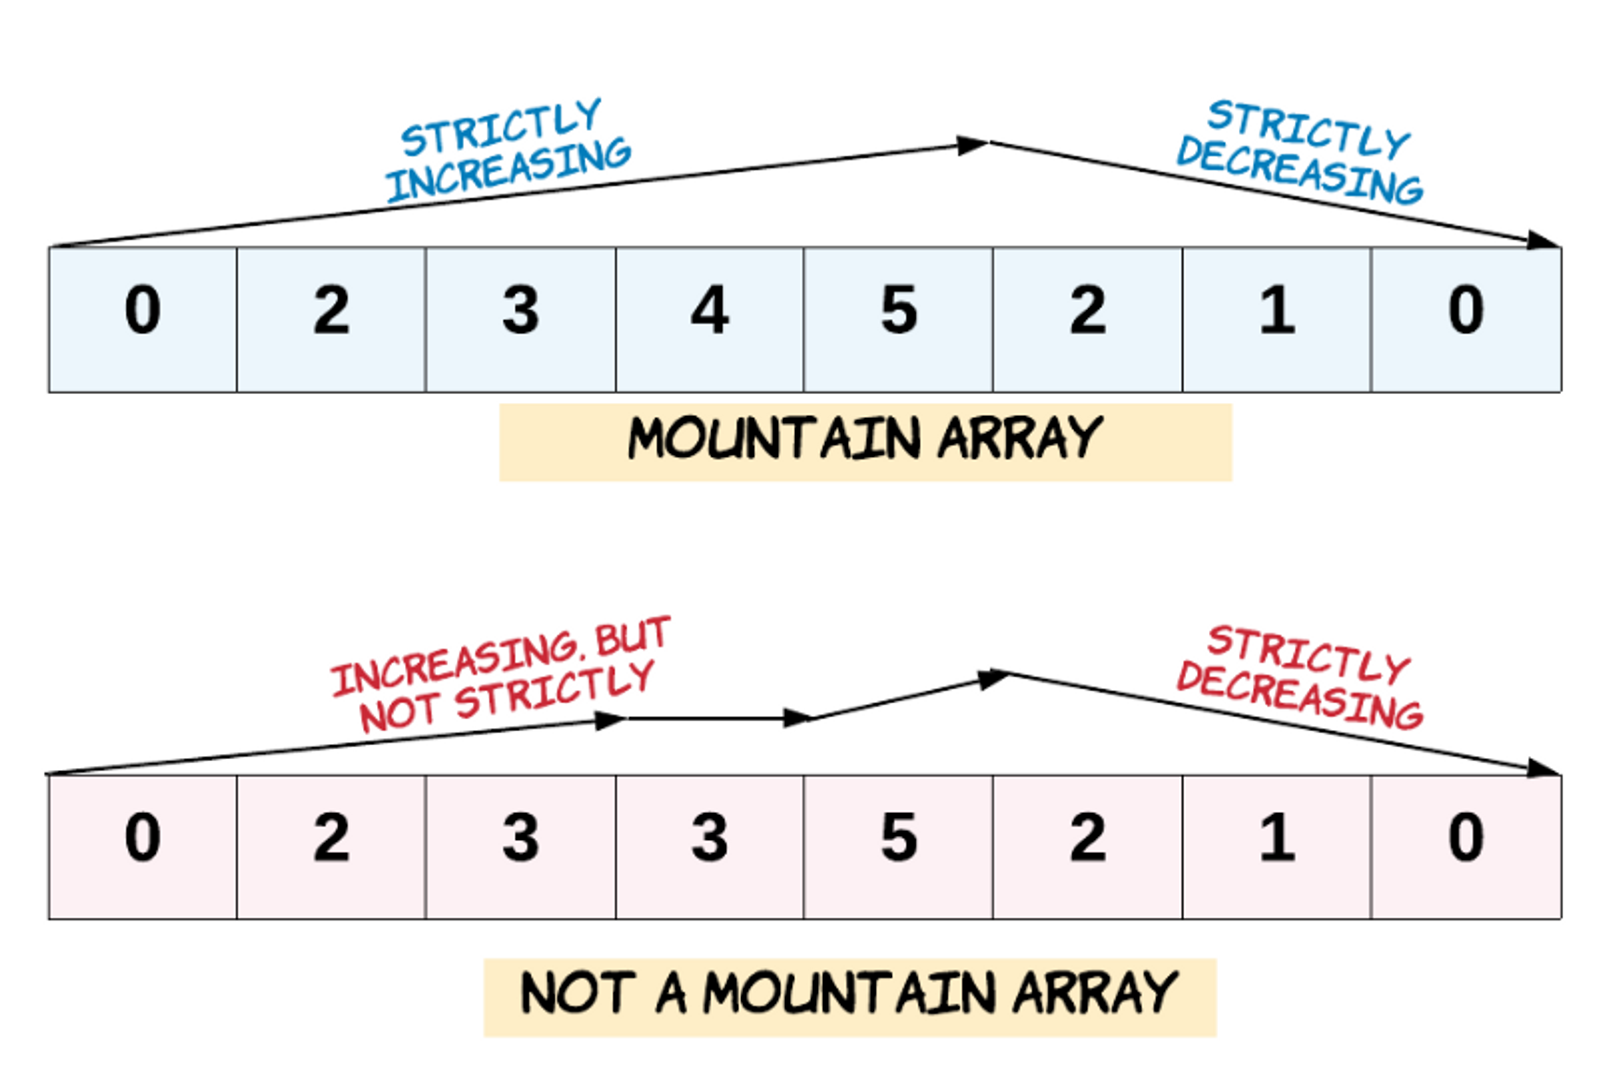

**Input:** arr = [2,1]

**Output:**

false

In [4]:
def validMountainArray(arr):
    if len(arr) < 3:
        return False

    left = 0
    right = len(arr) - 1

    while left < len(arr) - 1 and arr[left] < arr[left + 1]:
        left += 1

    if left == 0 or left == len(arr) - 1:
        return False

    while right > 0 and arr[right] < arr[right - 1]:
        right -= 1

    if right != len(arr) - 1:
        return False

    return True

arr = [2, 1]
print(validMountainArray(arr))  # Output: False


False


> ## Question 4
Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

In [5]:
def findMaxLength(nums):
    max_length = 0
    running_count = 0
    count = {0: -1}

    for i in range(len(nums)):
        if nums[i] == 0:
            running_count -= 1
        else:
            running_count += 1

        if running_count in count:
            max_length = max(max_length, i - count[running_count])
        else:
            count[running_count] = i

    return max_length

nums = [0, 1]
print(findMaxLength(nums))  # Output: 2


2


> ## Question 5
The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.

In [6]:
def minProductSum(nums1, nums2):
    nums1.sort()
    nums2.sort()

    left, right = 0, len(nums1) - 1
    min_product_sum = 0

    while left <= right:
        min_product_sum += nums1[left] * nums2[right]
        left += 1
        right -= 1

    return min_product_sum

nums1 = [5, 3, 4, 2]
nums2 = [4, 2, 2, 5]
print(minProductSum(nums1, nums2))  # Output: 40


22


> ## Question 6
An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].

In [7]:
def findOriginalArray(changed):
    if len(changed) % 2 != 0:
        return []

    original = []
    freq_map = {}

    for num in changed:
        freq_map[num] = freq_map.get(num, 0) + 1

    changed.sort()

    for num in changed:
        if freq_map.get(num, 0) == 0:
            continue

        double = num * 2
        if freq_map.get(double, 0) == 0:
            return []

        original.append(num)
        freq_map[num] -= 1
        freq_map[double] -= 1

    return original

changed = [1, 3, 4, 2, 6, 8]
print(findOriginalArray(changed))  # Output: [1, 3, 4]


[1, 3, 4]


> ## Question 7
Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

**Example 1:**

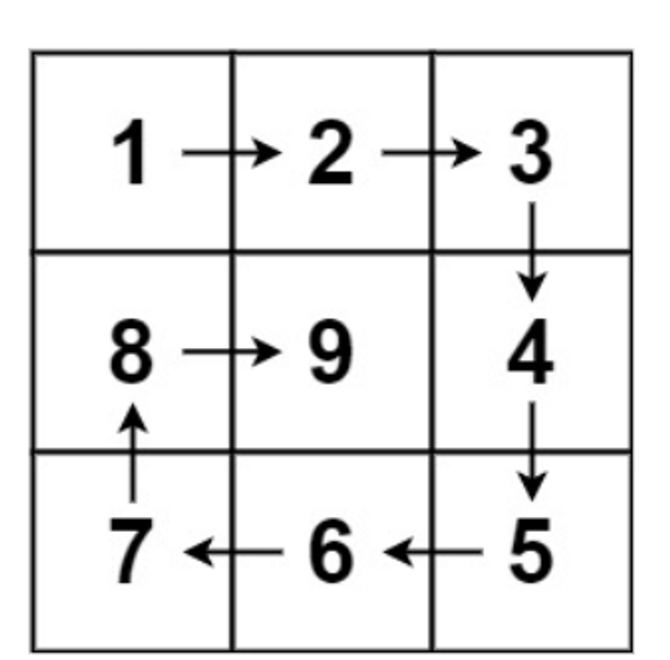


**Input:** n = 3

**Output:** [[1,2,3],[8,9,4],[7,6,5]]

In [8]:
def generateMatrix(n):
    matrix = [[0] * n for _ in range(n)]
    rowStart, rowEnd = 0, n - 1
    colStart, colEnd = 0, n - 1
    num = 1

    while rowStart <= rowEnd and colStart <= colEnd:
        for i in range(colStart, colEnd + 1):
            matrix[rowStart][i] = num
            num += 1
        rowStart += 1

        for i in range(rowStart, rowEnd + 1):
            matrix[i][colEnd] = num
            num += 1
        colEnd -= 1

        if rowStart <= rowEnd:
            for i in range(colEnd, colStart - 1, -1):
                matrix[rowEnd][i] = num
                num += 1
            rowEnd -= 1

        if colStart <= colEnd:
            for i in range(rowEnd, rowStart - 1, -1):
                matrix[i][colStart] = num
                num += 1
            colStart += 1

    return matrix

n = 3
print(generateMatrix(n))


[[1, 2, 3], [8, 9, 4], [7, 6, 5]]


> ## Question 8
Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

**Example 1:**

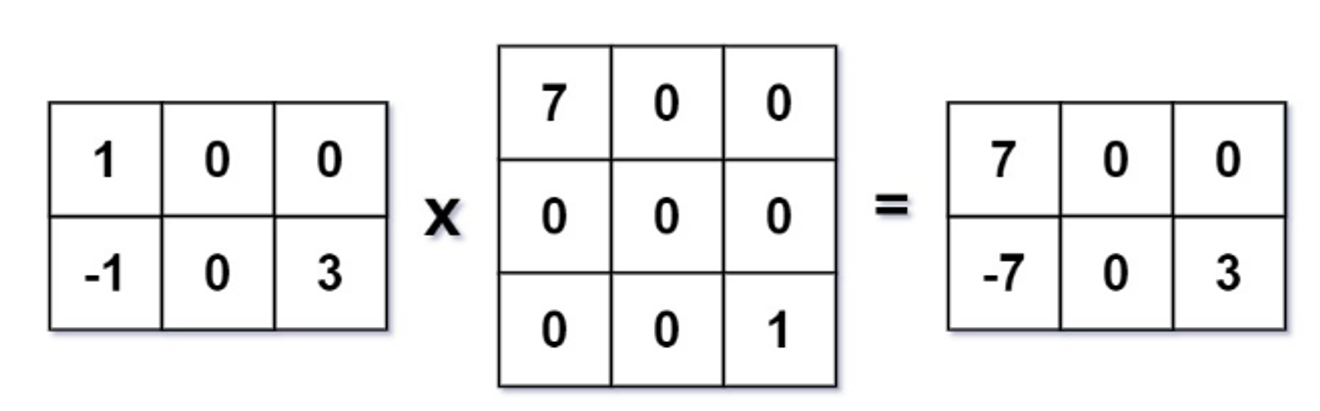

**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

**Output:**

[[7,0,0],[-7,0,3]]

In [9]:
def multiply(mat1, mat2):
    m = len(mat1)
    k = len(mat1[0])
    n = len(mat2[0])

    result = [[0] * n for _ in range(m)]

    for i in range(m):
        for j in range(n):
            sum = 0
            for k in range(k):
                sum += mat1[i][k] * mat2[k][j]
            result[i][j] = sum

    return result

mat1 = [[1, 0, 0], [-1, 0, 3]]
mat2 = [[7, 0, 0], [0, 0, 0], [0, 0, 1]]
print(multiply(mat1, mat2))


[[7, 0, 0], [0, 0, 0]]
